In [12]:
# # Importing Packages
import os
import copy
import config
import dota2api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

In [13]:
# # STEAM Client API Key to access the dota2 api
API_KEY = config.STEAM_API_KEY
api = dota2api.Initialise(API_KEY)

In [14]:
data = pd.read_csv('../data/draft/capmodedata.csv')

In [15]:
data.head(5)

,match_id,radiant_win,duration,1is_pick,1team_id,1hero_id,2is_pick,2team_id,2hero_id,3is_pick,...,17hero_id,18is_pick,18team_id,18hero_id,19is_pick,19team_id,19hero_id,20is_pick,20team_id,20hero_id
0,1928898739,True,2885,False,0,73,False,1,69,False,...,41.0,False,0.0,81.0,True,1.0,105.0,True,0.0,94.0
1,1928932285,True,1894,False,0,69,False,1,102,False,...,40.0,False,0.0,28.0,True,1.0,97.0,True,0.0,62.0
2,1928903165,True,2424,False,1,85,False,0,68,False,...,30.0,False,1.0,47.0,True,0.0,58.0,True,1.0,33.0
3,1928907204,True,2588,False,1,71,False,0,73,False,...,30.0,False,1.0,68.0,True,0.0,50.0,True,1.0,21.0
4,1928865084,True,3658,False,1,12,False,0,42,False,...,93.0,False,1.0,67.0,True,0.0,72.0,True,1.0,40.0


In [16]:
data.columns

Index(['match_id', 'radiant_win', 'duration', '1is_pick', '1team_id',
       '1hero_id', '2is_pick', '2team_id', '2hero_id', '3is_pick', '3team_id',
       '3hero_id', '4is_pick', '4team_id', '4hero_id', '5is_pick', '5team_id',
       '5hero_id', '6is_pick', '6team_id', '6hero_id', '7is_pick', '7team_id',
       '7hero_id', '8is_pick', '8team_id', '8hero_id', '9is_pick', '9team_id',
       '9hero_id', '10is_pick', '10team_id', '10hero_id', '11is_pick',
       '11team_id', '11hero_id', '12is_pick', '12team_id', '12hero_id',
       '13is_pick', '13team_id', '13hero_id', '14is_pick', '14team_id',
       '14hero_id', '15is_pick', '15team_id', '15hero_id', '16is_pick',
       '16team_id', '16hero_id', '17is_pick', '17team_id', '17hero_id',
       '18is_pick', '18team_id', '18hero_id', '19is_pick', '19team_id',
       '19hero_id', '20is_pick', '20team_id', '20hero_id'],
      dtype='object')

In [17]:
# # # Getting Heroes ID according to the name
heroes = api.get_heroes()

In [7]:
heroes_dict = {}
for i in range (len(heroes['heroes'])):
    hero_id = heroes['heroes'][i]['id']
    hero_name = heroes['heroes'][i]['localized_name']
    heroes_dict[hero_id]= hero_name

In [18]:
def change_hero_name(row):
    if row in heroes_dict:
        return heroes_dict[row]
    
columns = [
    '1hero_id', 
    '2hero_id', 
    '3hero_id', 
    '4hero_id', 
    '5hero_id', 
    '6hero_id', 
    '7hero_id', 
    '8hero_id', 
    '9hero_id',
    '10hero_id',
    '11hero_id', 
    '12hero_id', 
    '13hero_id', 
    '14hero_id', 
    '15hero_id', 
    '16hero_id', 
    '17hero_id', 
    '18hero_id', 
    '19hero_id',
    '20hero_id'
    ]
    
for i in range(len(columns)):
    data[columns[i]] = data[columns[i]].apply(change_hero_name)

In [19]:
data.head(5)

,match_id,radiant_win,duration,1is_pick,1team_id,1hero_id,2is_pick,2team_id,2hero_id,3is_pick,...,17hero_id,18is_pick,18team_id,18hero_id,19is_pick,19team_id,19hero_id,20is_pick,20team_id,20hero_id
0,1928898739,True,2885,False,0,Alchemist,False,1,Doom,False,...,Faceless Void,False,0.0,Chaos Knight,True,1.0,Techies,True,0.0,Medusa
1,1928932285,True,1894,False,0,Doom,False,1,Abaddon,False,...,Venomancer,False,0.0,Slardar,True,1.0,Magnus,True,0.0,Bounty Hunter
2,1928903165,True,2424,False,1,Undying,False,0,Ancient Apparition,False,...,Witch Doctor,False,1.0,Viper,True,0.0,Enchantress,True,1.0,Enigma
3,1928907204,True,2588,False,1,Spirit Breaker,False,0,Alchemist,False,...,Witch Doctor,False,1.0,Ancient Apparition,True,0.0,Dazzle,True,1.0,Windranger
4,1928865084,True,3658,False,1,Phantom Lancer,False,0,Wraith King,False,...,Slark,False,1.0,Spectre,True,0.0,Gyrocopter,True,1.0,Venomancer


### Getting the longest match from the dataset (in minutes)

In [24]:
max_minutes = (np.max(data['duration'])) / 60
max_minutes

161.26666666666668

In [30]:
# # Plotting the graph of match played in minutes
data['minutes'] = data['duration'].apply(lambda x: x / 60)

In [31]:
groupby_minute = data.groupby(['minutes']).count()

In [32]:
groupby_minute.index

Float64Index([0.03333333333333333, 0.26666666666666666, 0.36666666666666664,
               0.5166666666666667,                0.55,  0.5833333333333334,
               0.6333333333333333,                0.65,                 0.8,
               0.8166666666666667,
              ...
               127.83333333333333,              129.05,              136.35,
                           138.05,              138.35,  140.86666666666667,
               142.46666666666667,               143.2,               153.3,
               161.26666666666668],
             dtype='float64', name='minutes', length=5184)

(array([819., 967., 968., 967., 949., 444.,  50.,  11.,   7.,   2.]),
 array([3.33333333e-02, 1.61566667e+01, 3.22800000e+01, 4.84033333e+01,
        6.45266667e+01, 8.06500000e+01, 9.67733333e+01, 1.12896667e+02,
        1.29020000e+02, 1.45143333e+02, 1.61266667e+02]),
 <a list of 10 Patch objects>)

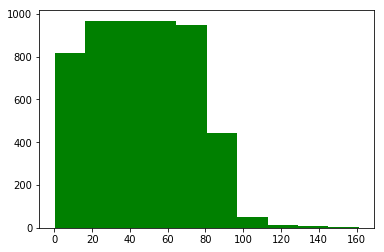

In [33]:
plt.hist(groupby_minute.index, histtype='bar', color='green')

### Getting the wins on both sides (Radiant / Dire)
### As there should be no bias, lets see which side of the map has the most win or is it equal?

In [35]:
base1 = data.loc[data['radiant_win'] == True]

In [36]:
len(base1)

233537

In [37]:
base2 = data.loc[data['radiant_win'] == False]

In [38]:
len(base2)

227513

In [40]:
# # Validation
total = len(base1) + len(base2)
print(total)
print(len(data))

461050
461050


In [41]:
# # Plotting the graph for both sides, it seems they are nearly equal (no bias on the sides here)
temp_a = ['radiant', 'dire']
temp_b = [len(base1), len(base2)]

<BarContainer object of 2 artists>

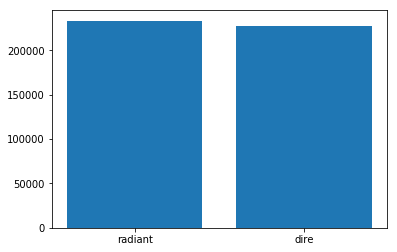

In [42]:
plt.bar(temp_a, temp_b)

## Let's Analyze the Draft

![alt text](image1.png "Title")

### Basic Draft Rules
- First team to get ban also gets last ban
- First team to get ban gets first pick
- Second team to get ban gets second and third pick consecutively
- Second team to get ban gets last pick

### Getting the first ban heroes

In [60]:
ban_1 = data['1hero_id']

In [61]:
ban1_count = data.groupby(data['1hero_id']).size()

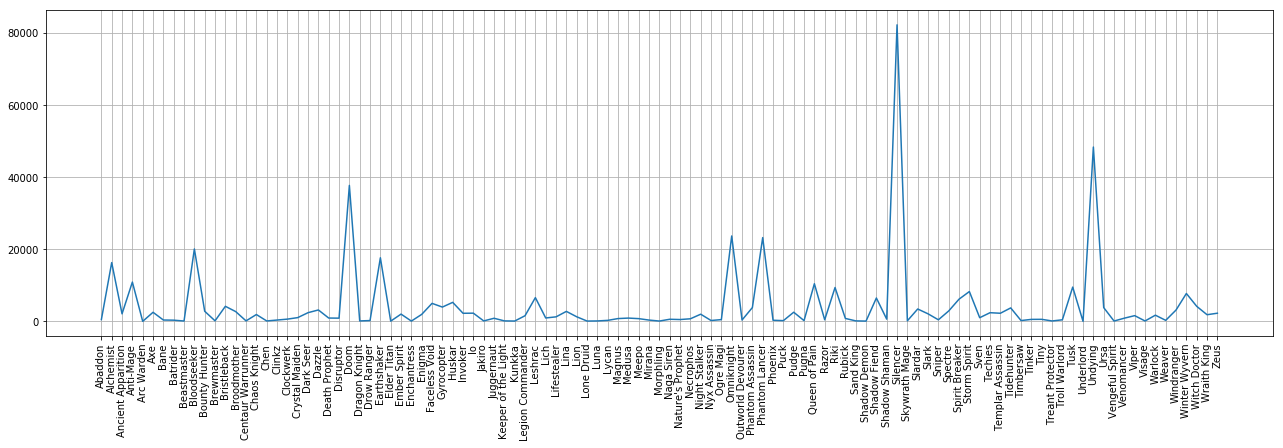

In [62]:
plt.rcParams['figure.figsize'] = 22, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(ban1_count.index, ban1_count.values)

##### From this figure, we can say that the most banned heroes on the first ban phase from a certain team is Silencer, Undying and Doom.

### Getting the second ban heroes

In [64]:
ban2_count = data.groupby(data['2hero_id']).size()

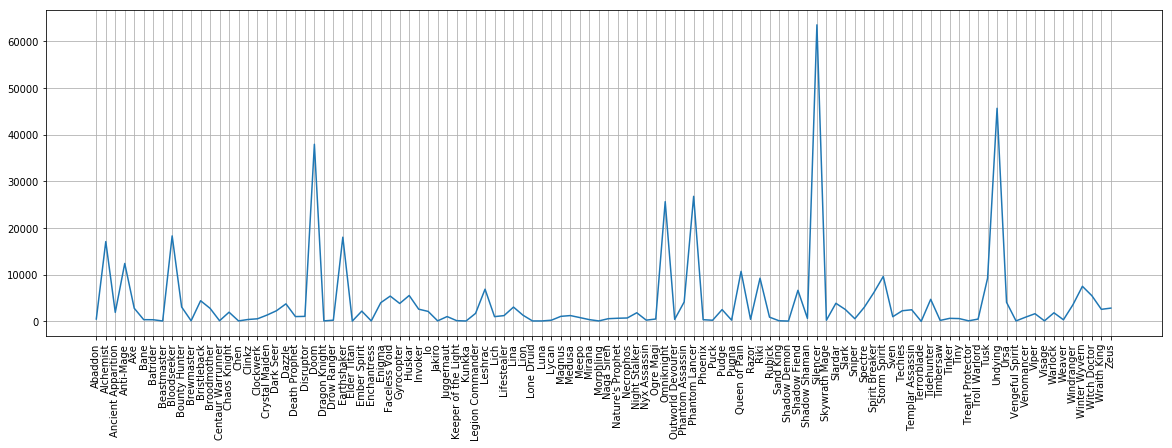

In [65]:
plt.rcParams['figure.figsize'] = 20, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(ban2_count.index, ban2_count.values)

##### The second ban phase also shows that Silencer, Undying and Doom are the most banned heroes, same as that of first ban phase

### Getting the third ban heroes

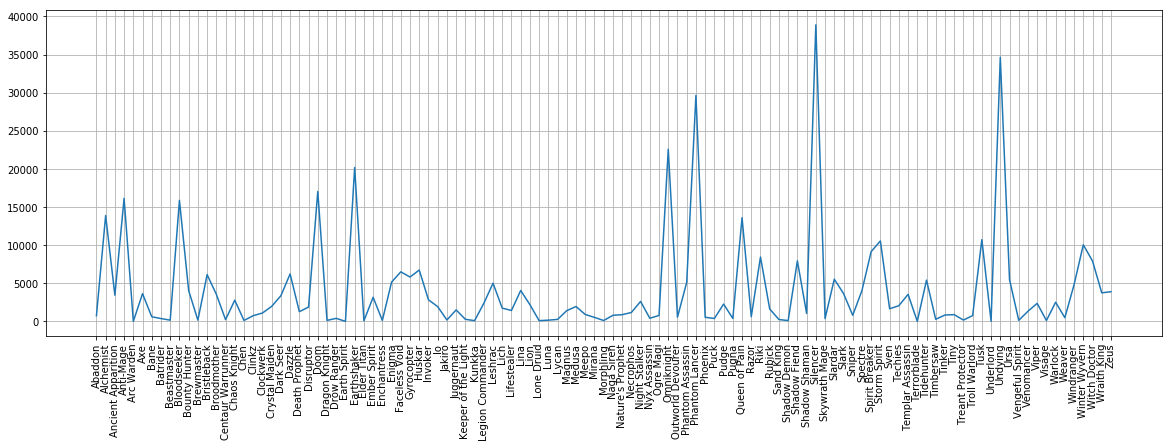

In [66]:
ban3_count = data.groupby(data['3hero_id']).size()
plt.rcParams['figure.figsize'] = 20, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(ban3_count.index, ban3_count.values)

##### The third ban phase has a different pattern which shows a rise of Antimage, Bloodseeker, Doom, Earthshaker, Ogre Magi, Phantom Lancer, Spirit Breaker, Strom Spirit and Winter Wyvern, a total of 9 new heroes on ban

### Getting the fourth ban heroes

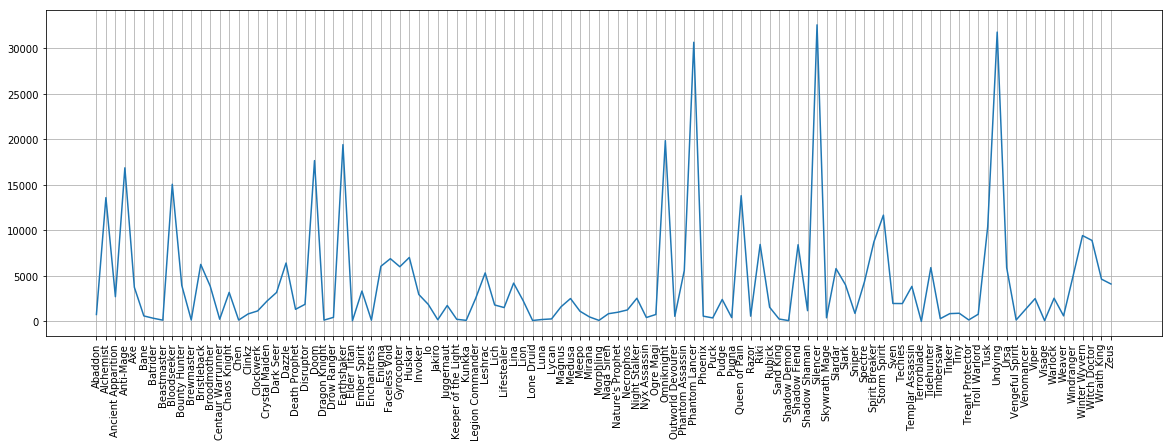

In [67]:
ban4_count = data.groupby(data['4hero_id']).size()
plt.rcParams['figure.figsize'] = 20, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(ban4_count.index, ban4_count.values)

##### The fourth ban phase shows similar pattern to the third ban phase with a exclusion of 2 heroes, Queen of Pain and Riki trying to come on top

### Getting bans from all phases (1, 2, 3, 4, 9, 10, 11, 12, 17, 18)

In [51]:
heroes_list = []
for i, j in enumerate(heroes_dict):
    hero_name = heroes_dict[j]
    heroes_list.append(hero_name)

In [52]:
total_ban = 10
columns = ['1hero_id', '2hero_id', '3hero_id', '4hero_id', '9hero_id', '10hero_id', '11hero_id', '12hero_id', '17hero_id', '18hero_id']
all_data = pd.DataFrame(columns=columns, index=heroes_list)

In [53]:
# # Sorting alphabetically
all_data.sort_index()

,1hero_id,2hero_id,3hero_id,4hero_id,9hero_id,10hero_id,11hero_id,12hero_id,17hero_id,18hero_id
Abaddon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alchemist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ancient Apparition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anti-Mage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arc Warden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Axe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Batrider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beastmaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bloodseeker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
for i in range(total_ban):
    all_data[columns[i]] = data.groupby(data[columns[i]]).size()

In [55]:
all_data

,1hero_id,2hero_id,3hero_id,4hero_id,9hero_id,10hero_id,11hero_id,12hero_id,17hero_id,18hero_id
Anti-Mage,10887.0,12392.0,16132.0,16880.0,28283.0,27217.0,25382.0,24606.0,18704.0,18923.0
Axe,2514.0,2809.0,3633.0,3745.0,9055.0,8164.0,6385.0,6429.0,5153.0,4957.0
Bane,369.0,361.0,602.0,596.0,752.0,807.0,755.0,751.0,993.0,924.0
Bloodseeker,20065.0,18299.0,15876.0,15072.0,14602.0,12813.0,11326.0,10766.0,7805.0,7472.0
Crystal Maiden,1033.0,1342.0,1965.0,2241.0,2643.0,2644.0,2702.0,2653.0,3519.0,3228.0
Drow Ranger,219.0,251.0,391.0,441.0,1571.0,1540.0,1343.0,1371.0,2249.0,2495.0
Earthshaker,17621.0,18024.0,20185.0,19430.0,12875.0,11931.0,9991.0,9342.0,6693.0,6487.0
Juggernaut,855.0,1028.0,1500.0,1744.0,4520.0,4700.0,5674.0,6254.0,7671.0,7803.0
Mirana,354.0,369.0,520.0,488.0,1141.0,1169.0,1065.0,1046.0,1319.0,1368.0
Shadow Fiend,6470.0,6652.0,7938.0,8425.0,11640.0,11353.0,11989.0,11927.0,16700.0,17998.0


In [56]:
# # For this context, null value is the 0 value (i.e hero is not picked on it's respective phase)
all_data.fillna(value=0)

,1hero_id,2hero_id,3hero_id,4hero_id,9hero_id,10hero_id,11hero_id,12hero_id,17hero_id,18hero_id
Anti-Mage,10887.0,12392.0,16132.0,16880.0,28283.0,27217.0,25382.0,24606.0,18704.0,18923.0
Axe,2514.0,2809.0,3633.0,3745.0,9055.0,8164.0,6385.0,6429.0,5153.0,4957.0
Bane,369.0,361.0,602.0,596.0,752.0,807.0,755.0,751.0,993.0,924.0
Bloodseeker,20065.0,18299.0,15876.0,15072.0,14602.0,12813.0,11326.0,10766.0,7805.0,7472.0
Crystal Maiden,1033.0,1342.0,1965.0,2241.0,2643.0,2644.0,2702.0,2653.0,3519.0,3228.0
Drow Ranger,219.0,251.0,391.0,441.0,1571.0,1540.0,1343.0,1371.0,2249.0,2495.0
Earthshaker,17621.0,18024.0,20185.0,19430.0,12875.0,11931.0,9991.0,9342.0,6693.0,6487.0
Juggernaut,855.0,1028.0,1500.0,1744.0,4520.0,4700.0,5674.0,6254.0,7671.0,7803.0
Mirana,354.0,369.0,520.0,488.0,1141.0,1169.0,1065.0,1046.0,1319.0,1368.0
Shadow Fiend,6470.0,6652.0,7938.0,8425.0,11640.0,11353.0,11989.0,11927.0,16700.0,17998.0


##### From this above table, we can see that 4 heroes (Monkey King, Pangolier, Dark Willow and Grimstroke) have 0 bans, it's because heroes api was updated on steam client which fetched the new heroes but weren't in the old meta.

In [57]:
# # Grouping the heroes for plotting purpose
sum_all_data = all_data.sum(axis=1)

In [58]:
sum_all_data

Anti-Mage              199406.0
Axe                     52844.0
Bane                     6910.0
Bloodseeker            134096.0
Crystal Maiden          23970.0
Drow Ranger             11871.0
Earthshaker            132579.0
Juggernaut              41749.0
Mirana                   8839.0
Shadow Fiend           111092.0
Morphling                1401.0
Phantom Lancer         244466.0
Puck                     9647.0
Pudge                   22237.0
Razor                   14361.0
Sand King                5403.0
Storm Spirit           108197.0
Sven                    42068.0
Tiny                    17019.0
Vengeful Spirit          3786.0
Windranger              57866.0
Zeus                    54209.0
Kunkka                   2468.0
Lina                    49600.0
Lich                    23307.0
Lion                    31229.0
Shadow Shaman           13323.0
Slardar                 55222.0
Tidehunter              68210.0
Witch Doctor            71820.0
                         ...   
Nyx Assa

In [150]:
# # Plotting all the ban values

([<matplotlib.axis.YTick at 0x7f08d6cef160>,
 <a list of 7 Text yticklabel objects>)

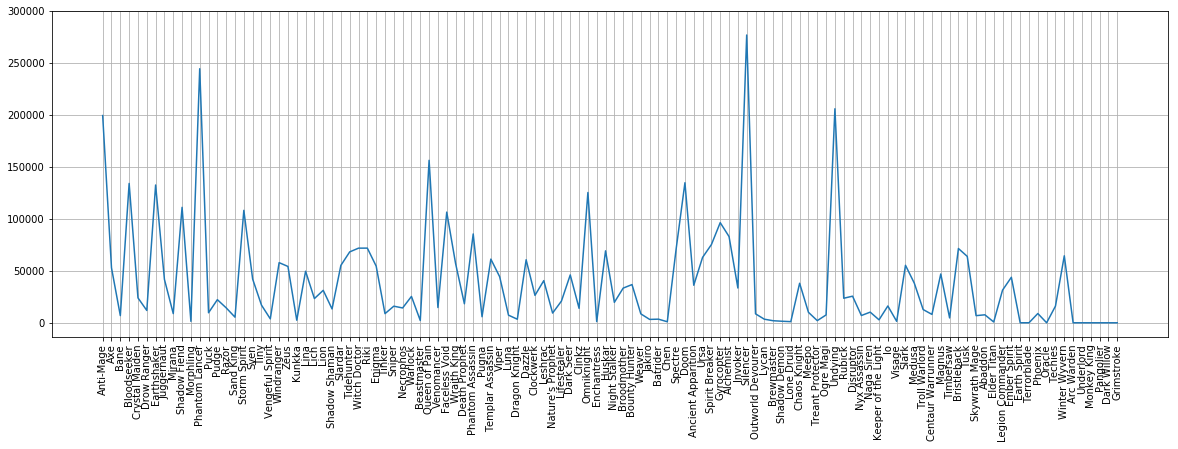

In [59]:
plt.grid()
plt.plot(sum_all_data.index, sum_all_data.values)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 350000, 50000))

##### The above graphs shows the most banned heroes from all the 10 ban phases where most of them shows good distribution except 3 heroes (Phantom Lancer, Silencer and Undying)

### Similarly, Getting the first pick heroes

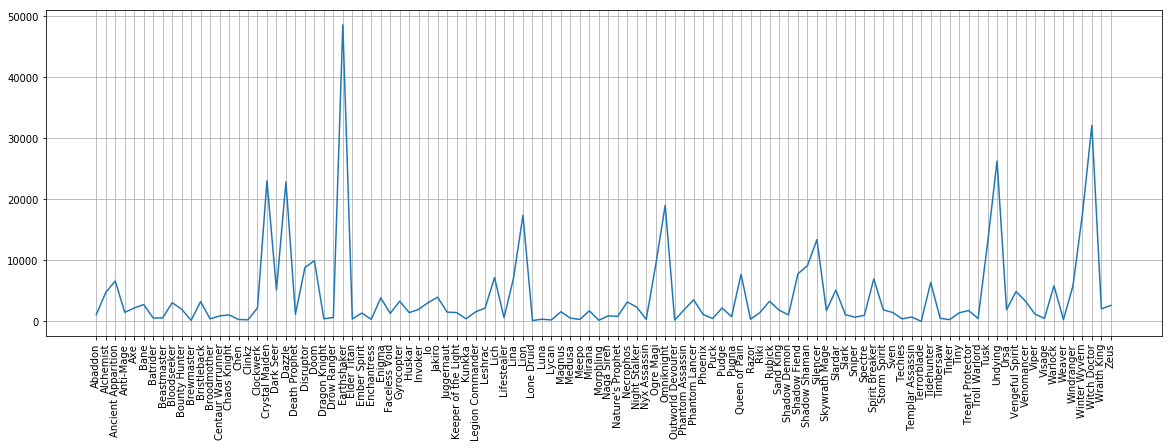

In [69]:
pick1_count = data.groupby(data['5hero_id']).size()
plt.rcParams['figure.figsize'] = 20, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(pick1_count.index, pick1_count.values)

##### This figure shows that picks are not as bad as ban as there are many option of heroes here to pick. These heroes include Crystal Maiden, Dazzzle, Earthshaker, Undying and Witch Doctor. This also shows that Undying is on both graphs (Pick and Ban) which means that Undying Hero was really popular in the meta

### Getting the second picked heroes

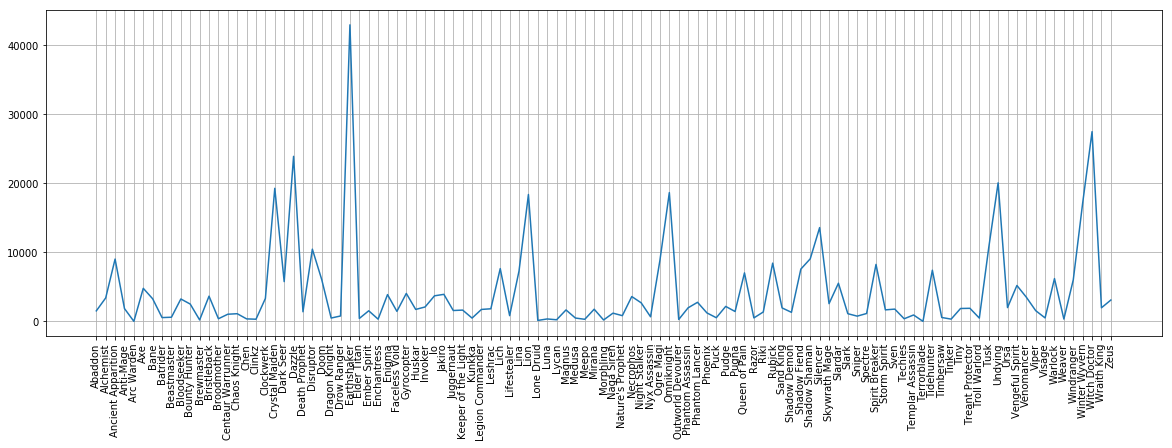

In [70]:
pick2_count = data.groupby(data['6hero_id']).size()
plt.rcParams['figure.figsize'] = 20, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(pick2_count.index, pick2_count.values)

##### Similar to the above graph but with the exception of heroes like Lion an Omniknight.

### Getting the third pick heroes

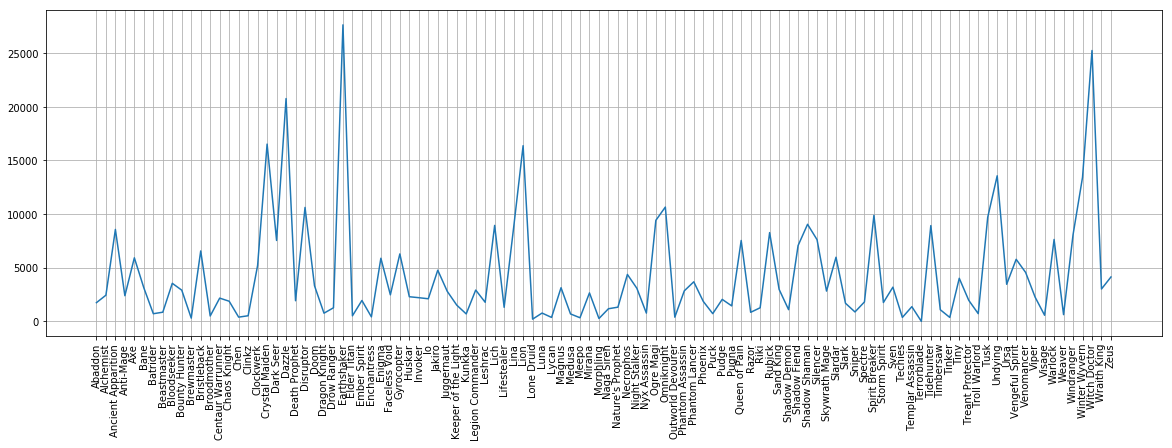

In [71]:
pick3_count = data.groupby(data['7hero_id']).size()
plt.rcParams['figure.figsize'] = 20, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(pick3_count.index, pick3_count.values)

##### As the six and seven pick always belong to the same team, we can conclude that the heroes of this graph and above can be paired on game. Heros like Crystal Maiden, Dazzle, Disruptor, Earthshaker, Lina, Lion, Ogre Magi, Omniknight, Shadow Sharman, Tush, Undying and Witch Doctor

### Getting graph for the most pick

In [72]:
total_pick = 10
columns = ['5hero_id', '6hero_id', '7hero_id', '8hero_id', '13hero_id', '14hero_id', '15hero_id', '16hero_id', '19hero_id', '20hero_id']
pick_all_data = pd.DataFrame(columns=columns, index=heroes_list)

In [73]:
pick_all_data

,5hero_id,6hero_id,7hero_id,8hero_id,13hero_id,14hero_id,15hero_id,16hero_id,19hero_id,20hero_id
Anti-Mage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Axe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bloodseeker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crystal Maiden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drow Ranger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Earthshaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Juggernaut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mirana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shadow Fiend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
for i in range(total_pick):
    pick_all_data[columns[i]] = data.groupby(data[columns[i]]).size()

In [76]:
# # As in our context, we fill Null values with 0 (i.e, not picked = 0)
pick_all_data.fillna(0)

,5hero_id,6hero_id,7hero_id,8hero_id,13hero_id,14hero_id,15hero_id,16hero_id,19hero_id,20hero_id
Anti-Mage,1473.0,1848.0,2392.0,4153.0,7617.0,7601.0,10191.0,10878.0,8406.0,7696.0
Axe,2190.0,4781.0,5925.0,8543.0,9151.0,9182.0,6280.0,6383.0,4186.0,4300.0
Bane,2753.0,3267.0,3127.0,3087.0,1762.0,2188.0,1598.0,1557.0,1046.0,1177.0
Bloodseeker,3059.0,3238.0,3548.0,3781.0,5002.0,5159.0,5035.0,5079.0,3662.0,3765.0
Crystal Maiden,23045.0,19252.0,16526.0,12551.0,6020.0,5344.0,4148.0,3672.0,2516.0,2449.0
Drow Ranger,643.0,778.0,1266.0,1166.0,2437.0,2606.0,4318.0,4013.0,5552.0,5105.0
Earthshaker,48622.0,42908.0,27645.0,25206.0,11511.0,10859.0,6555.0,6459.0,3515.0,3744.0
Juggernaut,1513.0,1569.0,2802.0,2496.0,6426.0,6529.0,9972.0,9238.0,9286.0,8704.0
Mirana,1732.0,1758.0,2654.0,2370.0,2375.0,2216.0,2256.0,2155.0,2592.0,2480.0
Shadow Fiend,7807.0,7563.0,7064.0,5652.0,9155.0,7577.0,10826.0,9229.0,13617.0,11593.0


In [77]:
sum_all_pick_data = pick_all_data.sum(axis=1)

In [78]:
sum_all_pick_data.head(2)

Anti-Mage    62255.0
Axe          60921.0
dtype: float64

([<matplotlib.axis.YTick at 0x7f08c0c7ab38>,
 <a list of 6 Text yticklabel objects>)

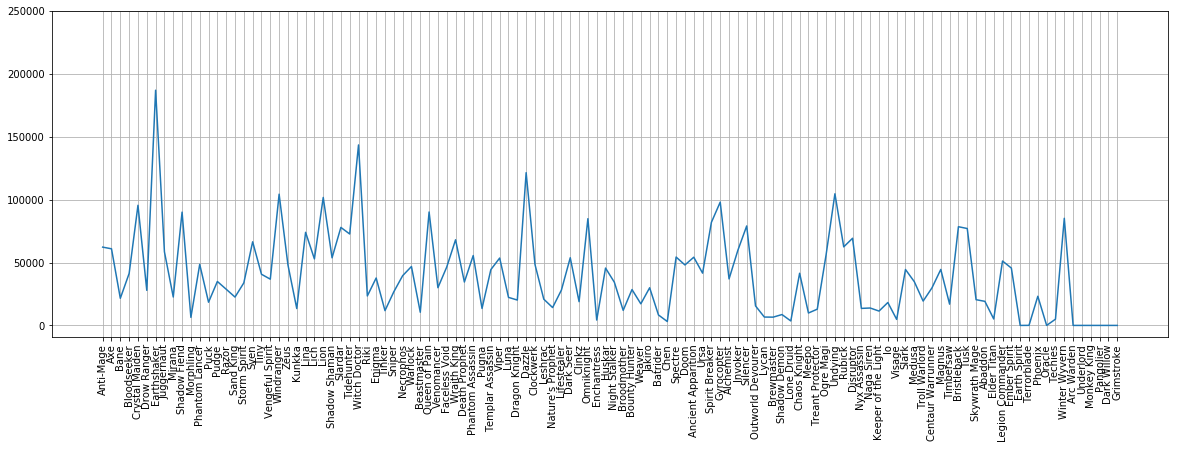

In [79]:
plt.grid()
plt.plot(sum_all_pick_data.index, sum_all_pick_data.values)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 300000, 50000))

##### Although the ban phase was really bad distribution, the pick distribution was actually really good for the meta compared to the ban phase graph, which means that all the heroes got playtime on the game

### Getting the most populat hero pairings on the basis of winrate

##### We can take win rates for 2nd picked team. (i.e: 6, 7, 13, 15, 20)
##### We can take win rates for 1st picked team. (i.e: 5, 8, 14, 16, 19)

In [101]:
temp = data.loc[data['1team_id'] == 0]
win1 = temp.loc[temp['radiant_win'] == True]
temp2 = data.loc[data['1team_id'] == 1]
win2 = temp2.loc[temp2['radiant_win'] == False]

In [102]:
to_concat_dataframes = [win1, win2]
all_win_data_only_1 = pd.concat(to_concat_dataframes)

In [103]:
temp = data.loc[data['1team_id'] == 0]
win1 = temp.loc[temp['radiant_win'] == False]
temp2 = data.loc[data['1team_id'] == 1]
win2 = temp2.loc[temp2['radiant_win'] == True]

In [104]:
to_concat_dataframes = [win1, win2]
all_win_data_only_2 = pd.concat(to_concat_dataframes)

In [107]:
# # Validation
print(all_win_data_only_1.shape)
print(all_win_data_only_2.shape)
print(all_win_data_only_1.shape[0] + all_win_data_only_2.shape[0])
print(data.shape[0])

(233738, 64)
(227312, 64)
461050
461050


In [108]:
all_win_data_only_1.sort_index()

,match_id,radiant_win,duration,1is_pick,1team_id,1hero_id,2is_pick,2team_id,2hero_id,3is_pick,...,18is_pick,18team_id,18hero_id,19is_pick,19team_id,19hero_id,20is_pick,20team_id,20hero_id,minutes
0,1928898739,True,2885,False,0,Alchemist,False,1,Doom,False,...,False,0.0,Chaos Knight,True,1.0,Techies,True,0.0,Medusa,48.083333
1,1928932285,True,1894,False,0,Doom,False,1,Abaddon,False,...,False,0.0,Slardar,True,1.0,Magnus,True,0.0,Bounty Hunter,31.566667
5,1928918721,False,2288,False,1,Silencer,False,0,Undying,False,...,False,1.0,Weaver,True,0.0,Bristleback,True,1.0,Legion Commander,38.133333
7,1928896797,True,2768,False,0,Huskar,False,1,Silencer,False,...,False,0.0,Queen of Pain,True,1.0,Invoker,True,0.0,Necrophos,46.133333
12,1928893986,True,2801,False,0,Silencer,False,1,Omniknight,False,...,False,0.0,Lina,True,1.0,Gyrocopter,True,0.0,Riki,46.683333
13,1928901539,False,2814,False,1,Silencer,False,0,Enigma,False,...,False,1.0,Phantom Assassin,True,0.0,Pudge,True,1.0,Zeus,46.900000
16,1928888035,False,2759,False,1,Tusk,False,0,Phantom Lancer,False,...,False,1.0,Tiny,True,0.0,Slark,True,1.0,Clockwerk,45.983333
19,1928927985,True,1990,False,0,Silencer,False,1,Tidehunter,False,...,False,0.0,Tusk,True,1.0,Queen of Pain,True,0.0,Witch Doctor,33.166667
21,1928890079,False,3048,False,1,Silencer,False,0,Tidehunter,False,...,False,1.0,Pudge,True,0.0,Windranger,True,1.0,Bristleback,50.800000
22,1928935461,True,1625,False,0,Bloodseeker,False,1,Alchemist,False,...,False,0.0,Anti-Mage,True,1.0,Lifestealer,True,0.0,Queen of Pain,27.083333


In [109]:
all_win_data_only_2.sort_index()

,match_id,radiant_win,duration,1is_pick,1team_id,1hero_id,2is_pick,2team_id,2hero_id,3is_pick,...,18is_pick,18team_id,18hero_id,19is_pick,19team_id,19hero_id,20is_pick,20team_id,20hero_id,minutes
2,1928903165,True,2424,False,1,Undying,False,0,Ancient Apparition,False,...,False,1.0,Viper,True,0.0,Enchantress,True,1.0,Enigma,40.400000
3,1928907204,True,2588,False,1,Spirit Breaker,False,0,Alchemist,False,...,False,1.0,Ancient Apparition,True,0.0,Dazzle,True,1.0,Windranger,43.133333
4,1928865084,True,3658,False,1,Phantom Lancer,False,0,Wraith King,False,...,False,1.0,Spectre,True,0.0,Gyrocopter,True,1.0,Venomancer,60.966667
6,1928926702,True,1998,False,1,Undying,False,0,Silencer,False,...,False,1.0,Ancient Apparition,True,0.0,Death Prophet,True,1.0,Kunkka,33.300000
8,1928902687,False,2595,False,0,Silencer,False,1,Omniknight,False,...,False,0.0,Shadow Fiend,True,1.0,Weaver,True,0.0,Windranger,43.250000
9,1928917475,False,2019,False,0,Doom,False,1,Undying,False,...,False,0.0,Vengeful Spirit,True,1.0,Lion,True,0.0,Disruptor,33.650000
10,1928908270,False,2329,False,0,Alchemist,False,1,Anti-Mage,False,...,False,0.0,Rubick,True,1.0,Viper,True,0.0,Dragon Knight,38.816667
11,1928901534,True,2626,False,1,Riki,False,0,Windranger,False,...,False,1.0,Gyrocopter,True,0.0,Weaver,True,1.0,Juggernaut,43.766667
14,1928897896,False,2841,False,0,Doom,False,1,Io,False,...,False,0.0,Anti-Mage,True,1.0,Necrophos,True,0.0,Dark Seer,47.350000
15,1928914863,False,2380,False,0,Tusk,False,1,Alchemist,False,...,False,0.0,Faceless Void,True,1.0,Spectre,True,0.0,Ember Spirit,39.666667


In [99]:
# # We can take win rates for 2nd picked team. (i.e: 6, 7, 13, 15, 20)
grouped_win_1 = all_win_data_only.groupby(['6hero_id', '7hero_id']).size()

In [100]:
np.unique(grouped_win_1.values)

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  150,  151,  1

#### From a Gamers Perspective
#### Dota totally depends on the meta. This draft is done on 6.* whereas the current meta is on 7.* So, this draft analysis, if used in real life on real games will not be good due to the meta changes.